<a href="https://colab.research.google.com/github/Faradezo/Coleta_e_Armazenamento/blob/main/Trabalho_de_Coleta_e_Armazenamento_de_Dados_Trilha_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests as rt
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

funcao que coleta os dados da pagina, gera a taela e inclui a coluna ano do respectivo

In [2]:
def scrape_stats(base_url, year_start, year_end):
  years = range(year_start, year_end+1, 1)
  final_df = pd.DataFrame()
  for year in years:
    print('Extraindo ano {}'.format(year))
    req_url = base_url.format(year)
    req = rt.get(req_url)
    soup = bs(req.content, 'html.parser')
    table = soup.find('table', {'id':'totals_stats'})
    df = pd.read_html(str(table))[0]
    df['Year'] = year
    final_df = final_df.append(df)
  return final_df

Obtendo à tabela

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


Remoção das colunas com nomes que se repetem e converter os valores numericos

In [ ]:
drop_indexes = df[df['Rk'] == 'Rk'].index
df.drop(drop_indexes, inplace = True)
numeric_cols = df.columns.drop(['Player', 'Pos', "Tm"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

Grafico Original do Modelo

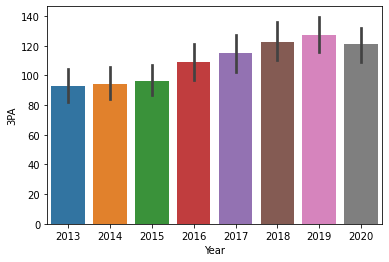

In [ ]:
sns.barplot(data= df[['3PA', 'Year']], x = 'Year', y = '3PA', )

Grafico em linha

Text(0.5, 1.0, '3PA X Year')

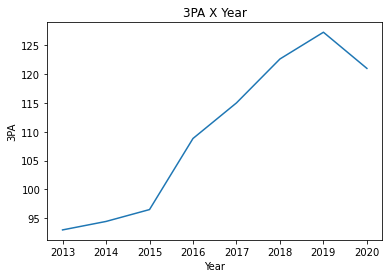

In [ ]:
grouped_df = df[['3P', '3PA', 'Year']].groupby('Year', as_index = False).mean() #Cria um novo df com apenas as duas colunas necessarias e faz a media dos 3PA para cada ano
sns.lineplot(data= grouped_df, x = 'Year', y = '3PA').set_title('3PA X Year')

Grafico Extra em linha com a diferença entre as tentativas de arremesso e os pontos bem sucedidos destes lances

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '3P x 3PA')

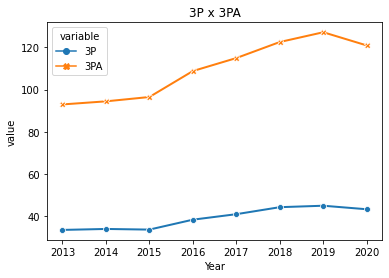

In [ ]:
sns.lineplot('Year', 'value', hue='variable', data = pd.melt(grouped_df, 'Year'), style='variable', markers = True, dashes=False, linewidth = 2).set_title('3P x 3PA')

In [ ]:
sorted_df = df.sort_values(by=['3P'], axis = 0, ascending=False)
sorted_df[['Player', '3P', 'Year']].head()

,Player,3P,Year
121,Stephen Curry,402,2016
165,Stephen Curry,354,2019
124,Stephen Curry,324,2017
267,James Harden,299,2020
140,Stephen Curry,286,2015


In [ ]:
grouped_df = df.groupby('Player', as_index = False).sum()
sorted_df = grouped_df.sort_values(by=['3P'], axis = 0, ascending = False)
sorted_df[['Player', '3P', '3PA']].head()

,Player,3P,3PA
958,Stephen Curry,1862,4281
201,Damian Lillard,1558,4210
650,Kyle Korver,1282,2936
652,Kyle Lowry,1194,3232
430,Jae Crowder,1177,3508


In [ ]:
db_years = pd.DataFrame()
for year in range(2013, 2021, 1):
  db_years[year] = df[['3PA', 'Year']][df['Year'] == year]['3PA']

In [ ]:
db_years.describe()

,2013,2014,2015,2016,2017,2018,2019,2020
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,92.984340,93.221477,94.033557,109.317673,116.776286,126.165548,132.762864,125.527964
std,123.042638,124.456064,116.129494,132.205073,131.735957,145.988403,144.352357,137.439325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,6.000000,8.000000,9.000000,15.000000,14.500000
50%,37.000000,31.000000,43.000000,53.000000,73.000000,61.000000,86.000000,83.000000
75%,144.500000,151.000000,149.500000,172.000000,182.500000,199.500000,202.000000,188.000000
max,600.000000,535.000000,646.000000,886.000000,789.000000,629.000000,810.000000,843.000000
